Name: Navida Nandakumar<br>
Course: BUDT704<br>
Section: 0502<br>
Date: 10.06.2023<br>

## Data Analysis for Kickstarter 

This project will walk us through the analysis of the fundraising campaign organized by kickstarter for budding art entrpreneurs. We have more than 4000 datas available regarding the campaign organised so far. Let us summarize the data for further analysis.

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read CSV 
# Change file_path when using in different system
file_path = r'E:\Assignments\HW3_kickstarter.csv'
with open(file_path, mode='r') as kickstarter_campaign_values:
    # Perform data cleansing on data imported from the file
    kickstarter_campaign = [each_line.strip().split(',') for each_line in kickstarter_campaign_values]
kickstarter_campaign = np.array(kickstarter_campaign, dtype='str')

### Amount Pledged

The main motive of kickstarter is to raise money to fund projects for entrepreneurs using their platform. The most important category that we have to analyze is the amount pledged i.e the amount of money a project was able to get with the help of kickstarter platform. This will give us an estimate about the range of funds different projects are able to get.

In [2]:
# Load amount pledged data in USD
amount_pledged = np.where((kickstarter_campaign == 'usd_pledged')[0])
amount_pledged_index = int(amount_pledged[0])
amount_pledged_data = np.loadtxt(file_path,skiprows = 1,delimiter=',',usecols = amount_pledged_index)

# Descriptive statistics for amount pledged
number_project = amount_pledged_data.size
amount_pledged_data_min = amount_pledged_data.min()
amount_pledged_data_max = amount_pledged_data.max()
amount_pledged_data_mean = amount_pledged_data.mean()
amount_pledged_data_median = np.median(amount_pledged_data)
amount_pledged_data_standard_deviation = amount_pledged_data.std()

# Descriptive statistics report for amount pledged
print(f'Total number of projects: {number_project}')
print(f'The minimum value of the amount pledged: $ {amount_pledged_data_min:.2f}')
print(f'The maximum value of the amount pledged: $ {amount_pledged_data_max:.2f}')
print(f'The mean of the amount pledged: $ {amount_pledged_data_mean:.2f}')
print(f'The median of the amount pledged: $ {amount_pledged_data_median:.2f}')
print(f'The standard deviation of the amount pledged: $ {amount_pledged_data_standard_deviation:.2f}')

Total number of projects: 4184
The minimum value of the amount pledged: $ 0.00
The maximum value of the amount pledged: $ 111111.77
The mean of the amount pledged: $ 1242.12
The median of the amount pledged: $ 90.00
The standard deviation of the amount pledged: $ 5177.93


### Amount Pledged Inferences

After analysing the data about the amount, the following inferences can be made:

- The minimum amount pledged is USD 0, which means that there are some projects in the data that have not started to gain money as the projects could have been:

    - Cancelled
    - Failed
    - Still in progress
    - Suspended
    
- The average amount pledged for the projects is aroud USD 1200
- The highest amount pledged for the projects USD 111111.77
- High deviation can be observed when we compare the mean with the maximum amount pledged. 
- Based on the quality of the work exhibited, people are ready to pay high prices.
- To get more insights about projects, let us look into the categories of art.

### Art Categories

In the campaigns organized so far, the projects can be categorized into five categories

   - Painting
   - Digital art
   - Conceptual art 
   - Illustration  
   - Ceramics 
   
Let us analyse these categories for inferences.

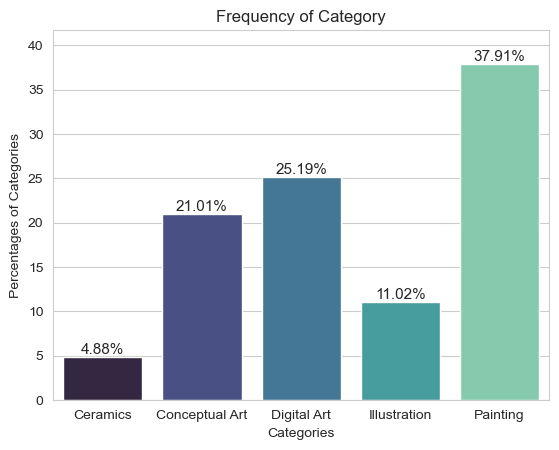

In [3]:
# Load category values
category = np.where((kickstarter_campaign == 'category')[0])
category_index = int(category[0])
category_data = np.loadtxt(file_path,skiprows = 1,delimiter=',',usecols = category_index,dtype = 'str')

# Calculate frequencies of category
category_name, category_number = np.unique(category_data, return_counts=True)

# Calculate frequency percentage
category_percent=[]
for i in range(0,len(category_number)):
    category_percent.append((category_number[i]/number_project)*100)

# Plotting bar graph for frequencies of category
title = 'Frequency of Category'
sns.set_style('whitegrid')
axes = sns.barplot(x=category_name,y=category_percent,palette='mako')
axes.set_title(title)
axes.set(xlabel = 'Categories',ylabel = 'Percentages of Categories')
axes.set_ylim(top = max(category_percent)*1.10)
for bar, frequency in zip (axes.patches, category_percent):
    text_x = bar.get_x()+bar.get_width()/2.0
    text_y = bar.get_height()
    text = f'{frequency:.2f}%'
    axes.text(text_x, text_y, text, fontsize=11, ha='center', va='bottom')

### Art Category Inferences:

Among the five different category, the following data can be observed:

- Majority of the project are associated with painting.
- Conceptual art and digital art are the next popular choice amongst the participants.
- Illustration and ceramics are the least preferred categories when compared to the other categories.

To see if the popular category of art has any relation to the state of the project, let us compare the categories with the state of the project to confirm whether the same trends follow

### State of project with Categories

The state of a project gives us information wheter the project has secured funding or not. Let us compare the state of the project with categories.


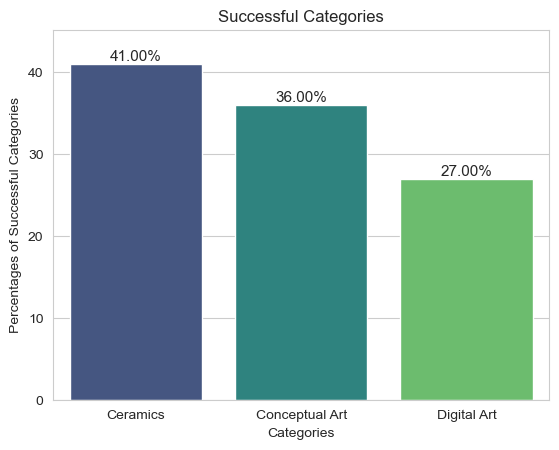

In [4]:
# Load state data
state = np.where((kickstarter_campaign == 'state')[0])
state_index = int(state[0])
state_data = np.loadtxt(file_path,skiprows = 1,delimiter=',',usecols = state_index,dtype='str')
# Calculate categories that were successful
state_success = np.where(state_data == 'successful')[0]
category_state_success = category_data[state_success]
state_name, state_number = np.unique(category_state_success, return_counts=True)

# Calculate percentage of successful categories
for i in range(0,len(state_number)):
    state_number[i] = (state_number[i]/category_number[i])*100

# Plotting bar graph for successful categories
title = 'Successful Categories'
sns.set_style('whitegrid')
axes = sns.barplot(x=state_name,y=state_number,palette='viridis')
axes.set_title(title)
axes.set(xlabel = 'Categories',ylabel = 'Percentages of Successful Categories')
axes.set_ylim(top = max(state_number)*1.10)
for bar, frequency in zip (axes.patches, state_number):
    text_x = bar.get_x()+bar.get_width()/2.0
    text_y = bar.get_height()
    text = f'{frequency:.2f}%'
    axes.text(text_x, text_y, text, fontsize=11, ha='center', va='bottom')

### Inferences about successful categories

- It can be observed that the majority of projects that have been funded comes under ceramics.
- Digital art has the least successful project associated with it.
- Though there are less number of projects associated with ceramics compared to other categories, it has more successful number of projects.
- There are two categories - painting and illustration where none of the projects are successful.
- Painting has highest number of projects associated with, but none of those projects are successful.


### Featuring of projects

Projects in kickstarter can be picked in two different ways. One is to hand picked by a staff and the other method is to be spotlighted on the kickstarter homepage. Let us analyse if there is any impact on the state of the project based on the way it was featured.

In [5]:
# Load staff picked data
staff_pick = np.where((kickstarter_campaign == 'staff_pick')[0])
staff_pick_index = int(staff_pick[0])
staff_pick_data = np.loadtxt(file_path,skiprows = 1,delimiter=',',usecols = staff_pick_index,dtype = 'str')

# Load spotlight data
spotlight = np.where((kickstarter_campaign == 'spotlight')[0])
spotlight_index = int(spotlight[0])
spotlight_data = np.loadtxt(file_path,skiprows = 1,delimiter=',',usecols = spotlight_index,dtype = 'str')

# Calcualte size of staff picked data 
staff_pick_size = (np.where(staff_pick_data == 'TRUE')[0]).size
print(f'The number of projects featured by staff picks: {staff_pick_size}')

# Calcualte size of staff picked data 
spotlight_size = (np.where(spotlight_data == 'TRUE')[0]).size
print(f'The number of projects featured by spotlight: {spotlight_size}')

# Calculate staff picked projects that were successful
staff_pick_success = (np.where((staff_pick_data == 'TRUE') & (state_data == 'successful'))[0]).size

# Calculate spotlighted projects that were successful
spotlight_success = (np.where((spotlight_data == 'TRUE') & (state_data == 'successful'))[0]).size

# Caculate the percentage of staff pick, spotlight projects
staff_pick_state_percent = (staff_pick_success/staff_pick_size)*100
spotlight_state_percent = (spotlight_success/spotlight_size)*100

# Find feature with high success rate
if staff_pick_state_percent > spotlight_state_percent:
    print(f"Staff pick is associated with higher number of successful projects with {staff_pick_state_percent:.2f} %")
    print(f"Spotlight is associated with least number of successful projects with {spotlight_state_percent:.2f} %")
elif staff_pick_state_percent < spotlight_state_percent:
    print(f"Spotlight is associated with higher number of successful projects with {spotlight_state_percent:.2f} %")
    print(f"Staff pick is associated with least number of successful projects with {staff_pick_state_percent:.2f} %")
else:
    print(f"Both the feature have equal number of successful projects with {spotlight_state_percent:.2f} %")

The number of projects featured by staff picks: 224
The number of projects featured by spotlight: 692
Spotlight is associated with higher number of successful projects with 100.00 %
Staff pick is associated with least number of successful projects with 72.77 %


### Inferences about features of project

- It can be observed that all the  project that was featured by spotlight was successful.
- Around 28% of projects that were picked by staffs were not successful
- People willing to fund art projects get quick access to the details of the projects when they are spotlighted.
- Based on the number of visitors to the kickstarter homepage, this value could change.
- Hence all projects that were spotlighted got more reach among the donors and were able to achieve their goals.

### Further analysis

So far we have found out the categories with successful projects and the feature with the most successful projects. Let us check the trends of categories with succesful project that was spotlighted.


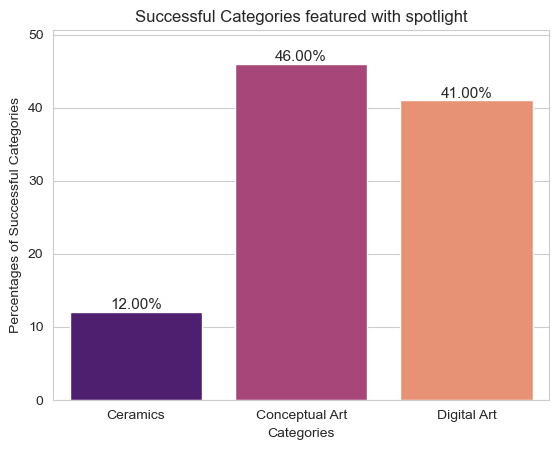

In [6]:
# Fetching data for sucessful categorier that were spotlighted
spotlight_category = np.where((spotlight_data == 'TRUE') & (state_data == 'successful'))[0]
spotlight_category_success = category_data[spotlight_category]
spotlight_category_name, spotlight_category_number = np.unique(spotlight_category_success, return_counts=True)

# Calculate percentage of successful categories that were spotlighted
for i in range(0,len(spotlight_category_number)):
    spotlight_category_number[i] = (spotlight_category_number[i]/spotlight_size)*100

# Plotting bar graph for successful categories that were spotlighted
title = 'Successful Categories featured with spotlight'
sns.set_style('whitegrid')
axes = sns.barplot(x=spotlight_category_name,y=spotlight_category_number,palette='magma')
axes.set_title(title)
axes.set(xlabel = 'Categories',ylabel = 'Percentages of Successful Categories')
axes.set_ylim(top = max(spotlight_category_number)*1.10)
for bar, frequency in zip (axes.patches, spotlight_category_number):
    text_x = bar.get_x()+bar.get_width()/2.0
    text_y = bar.get_height()
    text = f'{frequency:.2f}%'
    axes.text(text_x, text_y, text, fontsize=11, ha='center', va='bottom')

## Conclusion

Let us summarize our findings

- In categories : Painting contributed the most, followed by digital art and conceptual art
- In categories with successful projects : Ceramics contributed the most followed by conceptual art and digital art
- In categories with sucessful projects that was spotlighted: Conceptual art contributed the most follwed by digital art and ceramics

With the above pointers it can be concluded that conceptual art has remained steady in its contribution when we compare it in different data. It is gaining popularity among art entrepreneurs and it has shown good numbers in terms of having projects that are siccessful. It is one of the categories which was spotlighted in kickstarter page that gained highest success rate.

## Future Scope

### Kickstarter around the globe

To further make the campaigns organized by kickstarter more successful, we can work on expanding Kickstarter globally. In the campaigns organized by kickstarter, it can be observed projects from 17 countries was submitted for raising funds. Let us look at those details.


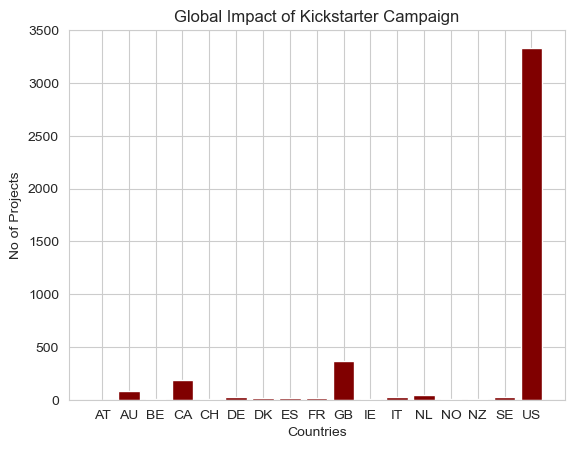

In [7]:
# Load country data
country = np.where((kickstarter_campaign == 'country')[0])
country_index = int(country[0])
country_data = np.loadtxt(file_path,skiprows = 1,delimiter=',',usecols = country_index,dtype='str')

# Calculate frequencies of countries
country_name, country_number = np.unique(country_data, return_counts=True)
country_percent=[]
for i in range(0,len(country_number)):
    country_percent.append((country_number[i]/number_project)*100)
plt.title('Global Impact of Kickstarter Campaign')
plt.xlabel('Countries')
plt.ylabel('No of Projects')
plt.bar(country_name,country_number, color='maroon')
plt.show()

- It can be noticed that though there are 17 countries, the majority of the projects have been submitted from the US
- The number of projects from remaining 16 countries is very minimal when compared to the US.
- The marketing team has to work on advertising kicstarter platform in those countries.
- This will increase the number of projects submitted and the donation amount for each campaigns in the kickstarted platform

"I pledge on my honor that I have not given nor received any unauthorized assistance on this assignment."
--Navida Nandakumar